<img align="right" width="300" src="https://data-services.hosting.nyu.edu/assets/libraries_short_color.png" alt="NYU Libraries Logo"><br/><br/>


# Introduction to OCR and Tesseract Software


**Nicholas Wolf**<br/>
[ORCID 0000-0001-5512-6151](https://orcid.org/0000-0001-5512-6151)

This lesson is licensed under a [Creative Commons Attribution-NonCommercial 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).

### Overview

This session is dedicated to exploring the tricks and tools available to build a workflow that turns digital images of text into computer-readable text. Its focus is on skills needed for an individual who is trying to bring together a corpus of texts for the purposes of text analysis, a website, a Digital Humanities project, or a small-scale digital library.

We'll focus on the following goals:

 - Review a few options for making the digital capture of a text.
 - Walk through some solutions for bulk transformation of image file types into formats that are OCR-ready
 - Take a look at using Tesseract 4 for OCR, using a few different languages as examples
 - \[TIME PERMITTING\]Examine the HOCR output structure
 
While much more difficult to use than another option, ABBYY FineReader, Tesseract is a really robust OCR tool with support for 4500 fonts and [~130 languages](https://github.com/tesseract-ocr/tessdata), trained on 400k lines of text. 


If you want to give Tesseract a try, here are some ideas on how to install it:

**Mac OS**

Use the Homebrew install utility:

Instructions for how to install Homebrew is available on the Homebrew homepage. From a Mac Terminal prompt, copy and paste this line and hit enter:

<code>/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"</code>


After Homebrew is installed, run:

<code>brew install tesseract</code>

Next install the full set of languages:

<code>brew install tesseract-lang</code>

Test to see if you are ready to go:

<code>tesseract -v</code>

If it shows you have some version of Tesseract 4 installed, that’s a good sign.

**Windows**

Over the years the University of Mannheim has maintained a stable and reliable distribution of Tesseract for Windows. See this very recent [walkthrough of installing via this write-up by Bharath Sivakumar and published on Medium](https://medium.com/quantrium-tech/installing-and-using-tesseract-4-on-windows-10-4f7930313f82).

The steps are:

Visit this [University of Mannheim distribution page](https://digi.bib.uni-mannheim.de/tesseract/) and download the version called [tesseract-ocr-w64-setup-v4.1.0.20190314.exe](http://tesseract-ocr-w64-setup-v4.1.0.20190314.exe). This one is for 64-bit processors (most Windows machines). If you have an older machine, you may need [tesseract-ocr-w32-setup-v4.1.0.20190314.exe](https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w32-setup-v4.1.0.20190314.exe). If you don’t know if you have a 32- or 64-bit, check out [this help article](https://support.microsoft.com/en-us/windows/32-bit-and-64-bit-windows-frequently-asked-questions-c6ca9541-8dce-4d48-0415-94a3faa2e13d) on detecting which version you have.

To test success of installation, open a Windows cmd prompt and type:

<code>tesseract -v</code>

If it shows you have some version of Tesseract 4 installed, you should be set.



### Sample Files

You are encouraged to use your own texts when walking through the steps below. If you don't have one, consider downloading one of these:

 - Title pages and first page of a printed account of the sentencing of Claudio Feliú Fontanills for impersonation, 1862, in Spanish, digitized book held by the Library of Congress. Record at [https://hdl.loc.gov/loc.law/llhsp.2018682655](https://hdl.loc.gov/loc.law/llhsp.2018682655). Filenames [fontanills-1862-1.jpg](https://drive.google.com/file/d/1lvf_jxTgRVelGz2lekr56r4E68gGeGIv/view?usp=sharing), [fontanills-1862-2.jpg](https://drive.google.com/file/d/1mHGPoK7WI2qinbDMWK9loQ7EBnluAczA/view?usp=sharing), [fontanills-1862-3.jpg](https://drive.google.com/file/d/1mOQFnQTmk_KDrVTyYUBCzV2AU0ejXk58/view?usp=sharing).
 - Single typescript page from a Works Progress Administration oral-history project, an interview of Vincent Violai D'Atr, 1938. Digital image provided by Library of Congress. Record at [https://www.loc.gov/item/wpalh001634](https://www.loc.gov/item/wpalh001634). Filename [wpa-lifehistory-swenson-1938.tif](https://drive.google.com/file/d/1mc25VNMJfn61ARjyR92ostqsi58lnaOb/view?usp=sharing).
 
### Don't Have Tesseract but Want To Try It on Your File?

Upload a single image file, using a distinct filename (such as one made from your name) and a hyphen along with the [three-letter language code](https://www.loc.gov/standards/iso639-2/php/code_list.php). I'll try doing a bulk OCR operation at the break:

[Upload Folder](https://drive.google.com/drive/folders/1rcPtRP8jsiCZR7dQAste0l76yedLdRgc?usp=sharing)

Example:

LASTNAME-eng.jpg

Please use PNG, JPG, or TIF formats only.

## 1. First Things: When Do You Need OCR?

Or rather, when do you not need OCR? An image file that contains embedded encoded text or a PDF that presents encoded text and not a bitmap image of text, does not need to be subject to OCR to turn it into the text needed for search or analysis. In most PDF readers such as Adobe DC, you can open such a PDF and select the option to export it to plain text, HTML, or another format:

<img align="left" width="400" src="dc-reader-export.png" alt="Image showing how to download a PDF as text using Adobve DC Reader via the top dropdown menu">


Many common command-line utilities related to PDFs also rely on this transformation available for non-bitmap representations to make a conversion. A common one is [XpdfReader](https://www.xpdfreader.com/pdftotext-man.html) (pdftotext), which can be installed and used to turn such PDFs quickly into plain text.

Here's an example using the UN [Universal Declaration of Human Rights](https://www.un.org/en/universal-declaration-human-rights/index.html), found in an 8-page PDF format on the UN website:

In [1]:
%%bash

pdftotext UN-DeclarationHumanRights.pdf - | head -n 2

Universal Declaration of Human Rights
Preamble Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom, justice and peace in the world, Whereas disregard and contempt for human rights have resulted in barbarous acts which have outraged the conscience of mankind, and the advent of a world in which human beings shall enjoy freedom of speech and belief and freedom from fear and want has been proclaimed as the highest aspiration of the common people, Whereas it is essential, if man is not to be compelled to have recourse, as a last resort, to rebellion against tyranny and oppression, that human rights should be protected by the rule of law, Whereas it is essential to promote the development of friendly relations between nations, Whereas the peoples of the United Nations have in the Charter reaffirmed their faith in fundamental human rights, in the dignity and worth of the human person and in the equ

This approach is theoretically language agnostic, since you are retrieving the character set embedded in that PDF. But in reality, as in this example of a [Health and Human Services PDF](https://www.hhs.gov/sites/default/files/sample-ce-notice-arabic.pdf) with Arabic script, you may run into problems of displaying the encoded text:

In [2]:
%%bash

pdftotext pdf-arabic-example.pdf - | head -n 2

Appendix A to Part 92--Sample Notice Informing Individuals About Nondiscrimination and Accessibility Requirements and Sample Nondiscrimination Statement: Discrimination is Against the Law             ]Name of covered entity[     ]Name of covered entity[   .           .                 :]Name of covered entity[ :             �             (      )    :           �         ]Name of Civil Rights Coordinator[                    ]Name of covered entity[     Name and Title of Civil [ :                 TTY number TTY number--if [ ]Telephone number[ ]Mailing Address[ ]Rights Coordinator .            .]Email[ ]Fax[ ]covered entity has one  .  ]Name of Civil Rights Coordinator[         ( Department of Health and Human Services          Office for    )  ( Office for Civil Rights   )  



## 2. Image Capture

A comparison matrix of some ways to scan texts on your phone from my [ABBYY online lesson](https://guides.nyu.edu/c.php?g=823477&p=5914830):

<table class="table table-bordered" style="border: 1px solid rgb(221, 221, 221);" summary="List of iPhone &amp; Android apps that allow for you to scan documents directly from your phone.">
	<colgroup>
		<col width="130" />
		<col width="115" />
		<col width="115" />
		<col width="115" />
		<col width="115" />
		<col width="115" />
	</colgroup>
	<thead>
		<tr>
			<th class="ck_border" scope="col" style="border: 1px solid rgb(221, 221, 221);">App</th>
			<th class="ck_border" scope="col" style="border: 1px solid rgb(221, 221, 221);">Cost</th>
			<th class="ck_border" scope="col" style="border: 1px solid rgb(221, 221, 221);">Capture Text</th>
			<th class="ck_border" scope="col" style="border: 1px solid rgb(221, 221, 221);">Multipage&nbsp;</th>
			<th class="ck_border" scope="col" style="border: 1px solid rgb(221, 221, 221);">Captures Photos</th>
			<th class="ck_border" scope="col" style="border: 1px solid rgb(221, 221, 221);">OCR</th>
			<th class="ck_border" scope="col" style="border: 1px solid rgb(221, 221, 221);">Output Format</th>
			<th class="ck_border" scope="col" style="border: 1px solid rgb(221, 221, 221);">Cloud Compatibility&nbsp;</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p><span style="text-align: center;">iScanner</span></p>
			<img alt="icon image of the iScanner logo" src="//libapps.s3.amazonaws.com/accounts/158730/images/iScanner.png" style="width: 100px; height: 100px;" /></td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">4.99</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>with PRO purchase</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>PDF</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Email. PRO: Dropbox, Google Drive, Evernote, Yandex.Disk, Box, OneDrive</p>
			</td>
		</tr>
		<tr>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Tiny Scanner</p>
			<img alt="icon image of the Tiny Scanner logo" src="//libapps.s3.amazonaws.com/accounts/158730/images/Tiny_Scanner.png" style="width: 100px; height: 100px;" /></td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">4.99</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>no</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>no</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>PDF</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Email. PRO: Dropbox, Evernote, Google Drive, Box, OneDrive, iCloud Drive</p>
			</td>
		</tr>
		<tr>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Genius Scanner</p>
			<img alt="icon image of the Genius Scanner logo" src="//libapps.s3.amazonaws.com/accounts/158730/images/Genius_Scanner.png" style="width: 100px; height: 100px;" /></td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">7.99</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>no</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>PDF, JPEG</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Email. Plus version: iCloud Drive, Box, Dropbox, Evernote, FTP, Google Drive, OneDrive, WebDAV, OneNote</p>
			</td>
		</tr>
		<tr>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>FineScanner</p>
			<img alt="icon image of the FineScanner logo" src="//libapps.s3.amazonaws.com/accounts/158730/images/ABBYY_FineScanner.png" style="width: 100px; height: 100px;" /></td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">0.83/month</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>no</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Choice between JPG and PDF<br />
			If you choose to RECOGNIZE on the app:DOCX, DOC, searchable PDF, PDF/A, XLSX, XLS, TXT, RTF, ODT, PPTX, EPUB, FB2</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Google Drive, Dropbox, Evernote, Microsoft OneNote, email, iCloud Drive, Facebook, iTunes, Box, Yanex.Disk</p>
			</td>
		</tr>
		<tr>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Evernote Scannable</p>
			<img alt="icon image of the Evernote Scannable logo" src="//libapps.s3.amazonaws.com/accounts/158730/images/Evernote_Scannable_icon.png" style="width: 100px; height: 100px;" /></td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">free</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>no</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>PDF</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Email and works with whatever compatible apps are on your phone</p>
			</td>
		</tr>
		<tr>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Dropbox</p>
			<img alt="icon image of the Dropbox logo" src="//libapps.s3.amazonaws.com/accounts/158730/images/Dropbox_icon.png" style="width: 100px; height: 100px;" /></td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">free</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>no</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>PDF, PNG</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>Dropbox</p>
			</td>
		</tr>
		<tr>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221); text-align: center;">
			<p>TurboScan</p>
			<img alt="icon image of the TurboScan logo" src="//libapps.s3.amazonaws.com/accounts/158730/images/TurboScan.png" style="width: 100px; height: 100px;" /></td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">free</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">no</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">yes</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">no</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">PDF, JPEG</p>
			</td>
			<td class="ck_border" style="border: 1px solid rgb(221, 221, 221);">
			<p style="text-align: center;">iCloud Drive, Email</p>
			</td>
		</tr>
	</tbody>
</table>


### Principles for Image Captures

Deskew is possible using image editors. But problems like this are deadly:

<img align="left" width="400" src="https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/54/2016/04/06144347/bad-scan-text-cut-off-375x425.png" alt="An image of a bad text page scan in which the binding causes the image to drop away from the plane of the scan" clear="both">

*Source: University of Washington Accessible Technology Resources, https://www.washington.edu/accessibility*

Parameters often stated:

 - 300 dpi minimum (sometimes, as with ABBYY, greater than 300 dpi not required)
 - If using a phone, keep plane of camera parallel to page
 - Avoid capture of text/characters outside of current page
 
See also this taxonomy of image-causing OCR problems from Tesseract: https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html

...or, toss some other (preferably open-source) image processing options in the chat!

## 3. Image Preprocessing

Typical steps include:

 - Apply grayscale (remove color from image)
 - Binarization (reduce all pixels to black or white)
 - Filter (e.g. of faint background shading)
 - Rotate / deskew
 - Text smoothing (via thresholding or blur)
 
A great tool is the OS-agnostic Fred's Image Magick textcleaner utility: [http://www.fmwconcepts.com/imagemagick/textcleaner](http://www.fmwconcepts.com/imagemagick/textcleaner)


## 4. Basic OCR with Tesseract

Basic usage, English language, plain text output:

In [3]:
%%bash

tesseract wpa-lifehistory-swenson-1938.tif wpa-lifehistory-text-output

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1


### Language Parameter

Adding the <code>-l</code> flag allows you to explicitly state the language or languages using the 
ISO 639-2 three-digit language codes. For example:
    
<code>-l spa</code>

or

<code>-l eng+spa</code>

A code list (from the Library of Congress) can be found here: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [5]:
%%bash

tesseract fontanills-1862-3.jpg fontanills-1862-3-text-output -l spa

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 384


### Let's take a look at your files....



## 5. Tesseract for Hundreds, Thousands, Millions of Files...

One of the real payoffs in using Tesseract is the ease with which bundles of PNG, JPG, and TIFF files can be converted:

From within the directory of files, in this case jpg files, 
we instruct Tesseract to run OCR on all files that end with the .jpg extension, removing the .jpg extension and naming the output file after the original file name.

In [4]:
%%bash

for page in *.jpg; do tesseract $page ${page/.jpg/}; done

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 581
Image too small to scale!! (2x36 vs min width of 3)
Line cannot be recognized!!
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 678
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 384


## 6. The HOCR Output

An HOCR file is an HTML-based means of describing an OCRd output matched to a single page/document. An outline of the specs are here: http://kba.cloud/hocr-spec/1.2/

In particular, let's focus on the BBOX property: http://kba.cloud/hocr-spec/1.2/#bbox

<img align="left" width="600" src="http://kba.cloud/hocr-spec/images/bbox-crop.png" alt="A depiction of how an HOCR file treats the x and y offsets of a bounding box surrounding a section of text">

In Tesseract, we can specify that an output be given in HOCR by including it as a parameter:

In [10]:
%%bash

tesseract wpa-lifehistory-swenson-1938.tif wpa-lifehistory-text-output hocr

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1


In particular, we can consider an ocr_line, which belongs to an ocr_par, which in turn belongs to an ocr_area:

````
    <div class='ocr_carea' id='block_1_11' title="bbox 333 1191 2448 1767">
        <p class='ocr_par' id='par_1_13' lang='eng' title="bbox 333 1191 2448 1767">
         <span class='ocr_line' id='line_1_18' title="bbox 336 1191 2448 1271; baseline -0.021 -3; x_size 45; x_descenders 10; x_ascenders 9">
          <span class='ocrx_word' id='word_1_54' title='bbox 336 1234 430 1269; x_wconf 23'>This</span>
          <span class='ocrx_word' id='word_1_55' title='bbox 459 1233 503 1266; x_wconf 92'>ie</span>
          <span class='ocrx_word' id='word_1_56' title='bbox 534 1228 680 1271; x_wconf 96'>really</span>
          <span class='ocrx_word' id='word_1_57' title='bbox 706 1228 857 1269; x_wconf 95'>happen</span>
          <span class='ocrx_word' id='word_1_58' title='bbox 882 1227 926 1258; x_wconf 95'>to</span>
          <span class='ocrx_word' id='word_1_59' title='bbox 955 1230 1006 1255; x_wconf 93'>an</span>
          <span class='ocrx_word' id='word_1_60' title='bbox 1029 1218 1155 1254; x_wconf 91'>unole</span>
          <span class='ocrx_word' id='word_1_61' title='bbox 1179 1217 1230 1251; x_wconf 96'>of</span>
          <span class='ocrx_word' id='word_1_62' title='bbox 1253 1216 1354 1249; x_wconf 79'>mine</span>
          <span class='ocrx_word' id='word_1_63' title='bbox 1380 1225 1433 1240; x_wconf 38'>&lt;«</span>
          <span class='ocrx_word' id='word_1_64' title='bbox 1456 1208 1577 1244; x_wconf 91'>Unele</span>
          <span class='ocrx_word' id='word_1_65' title='bbox 1603 1208 1795 1246; x_wconf 82'>Vincant,</span>
          <span class='ocrx_word' id='word_1_66' title='bbox 1830 1205 1877 1235; x_wconf 85'>o:</span>
          <span class='ocrx_word' id='word_1_67' title='bbox 1901 1200 2028 1234; x_wconf 74'>which</span>
          <span class='ocrx_word' id='word_1_68' title='bbox 2058 1201 2077 1232; x_wconf 95'>I</span>
          <span class='ocrx_word' id='word_1_69' title='bbox 2103 1206 2157 1229; x_wconf 93'>am</span>
          <span class='ocrx_word' id='word_1_70' title='bbox 2179 1191 2448 1231; x_wconf 89'>christeneds</span>
         </span>
````

Every word, line, and page area has its own bounding box. We can write some quick code in Python to visualize this.

The approach below is to treat each line bounding box coordinates as an array. We then use the Python PIL library to overlay boxes over the base image:

In [11]:
import numpy as np
from bs4 import BeautifulSoup
from PIL import Image, ImageOps, ImageDraw
from IPython.display import display



def load_hocr_lines(filepath):
    """
    Page Array Structure
    col 0 = ID number of line
    col 1-4 = bbbox x1, y1, x2, y2
    """
    page_array = []
    rawhtml = BeautifulSoup(open(filepath, encoding='utf-8'), "lxml")
    for line in rawhtml.html.body.div.find_all('span'):
        line_list = []
        if line['class'][0] == 'ocr_line':
            line_list.append(int(line['id'].split('_')[2]))
            line_list += [int(i) for i in line['title'].split(';')[0].split(' ')[1:]]
            page_array.append(line_list)
    return np.array(page_array)


def imagebuilder(page_array, image_filename):

    pageimg = Image.open(image_filename).convert('RGB')
    overlay = ImageDraw.Draw(pageimg, 'RGBA')

    # Draw the hocr boxes
    
    for i in range(len(page_array)):
        
        overlay.polygon([(page_array[i, 1], page_array[i, 4]),
                         (page_array[i, 1], page_array[i, 2]),
                         (page_array[i, 3], page_array[i, 2]),
                         (page_array[i, 3], page_array[i, 4])],
                         fill=(255, 0, 0, 90))
        

    display(pageimg)

    
np_array = load_hocr_lines('wpa-lifehistory-text-output.hocr')
np_array[0:5]

array([[   1, 1692,   47, 2400,   93],
       [   2, 1679,  101, 2200,  141],
       [   3, 2077,  189, 2271,  217],
       [   4, 1227,  243, 1369,  270],
       [   5, 2155,  276, 2204,  285]])

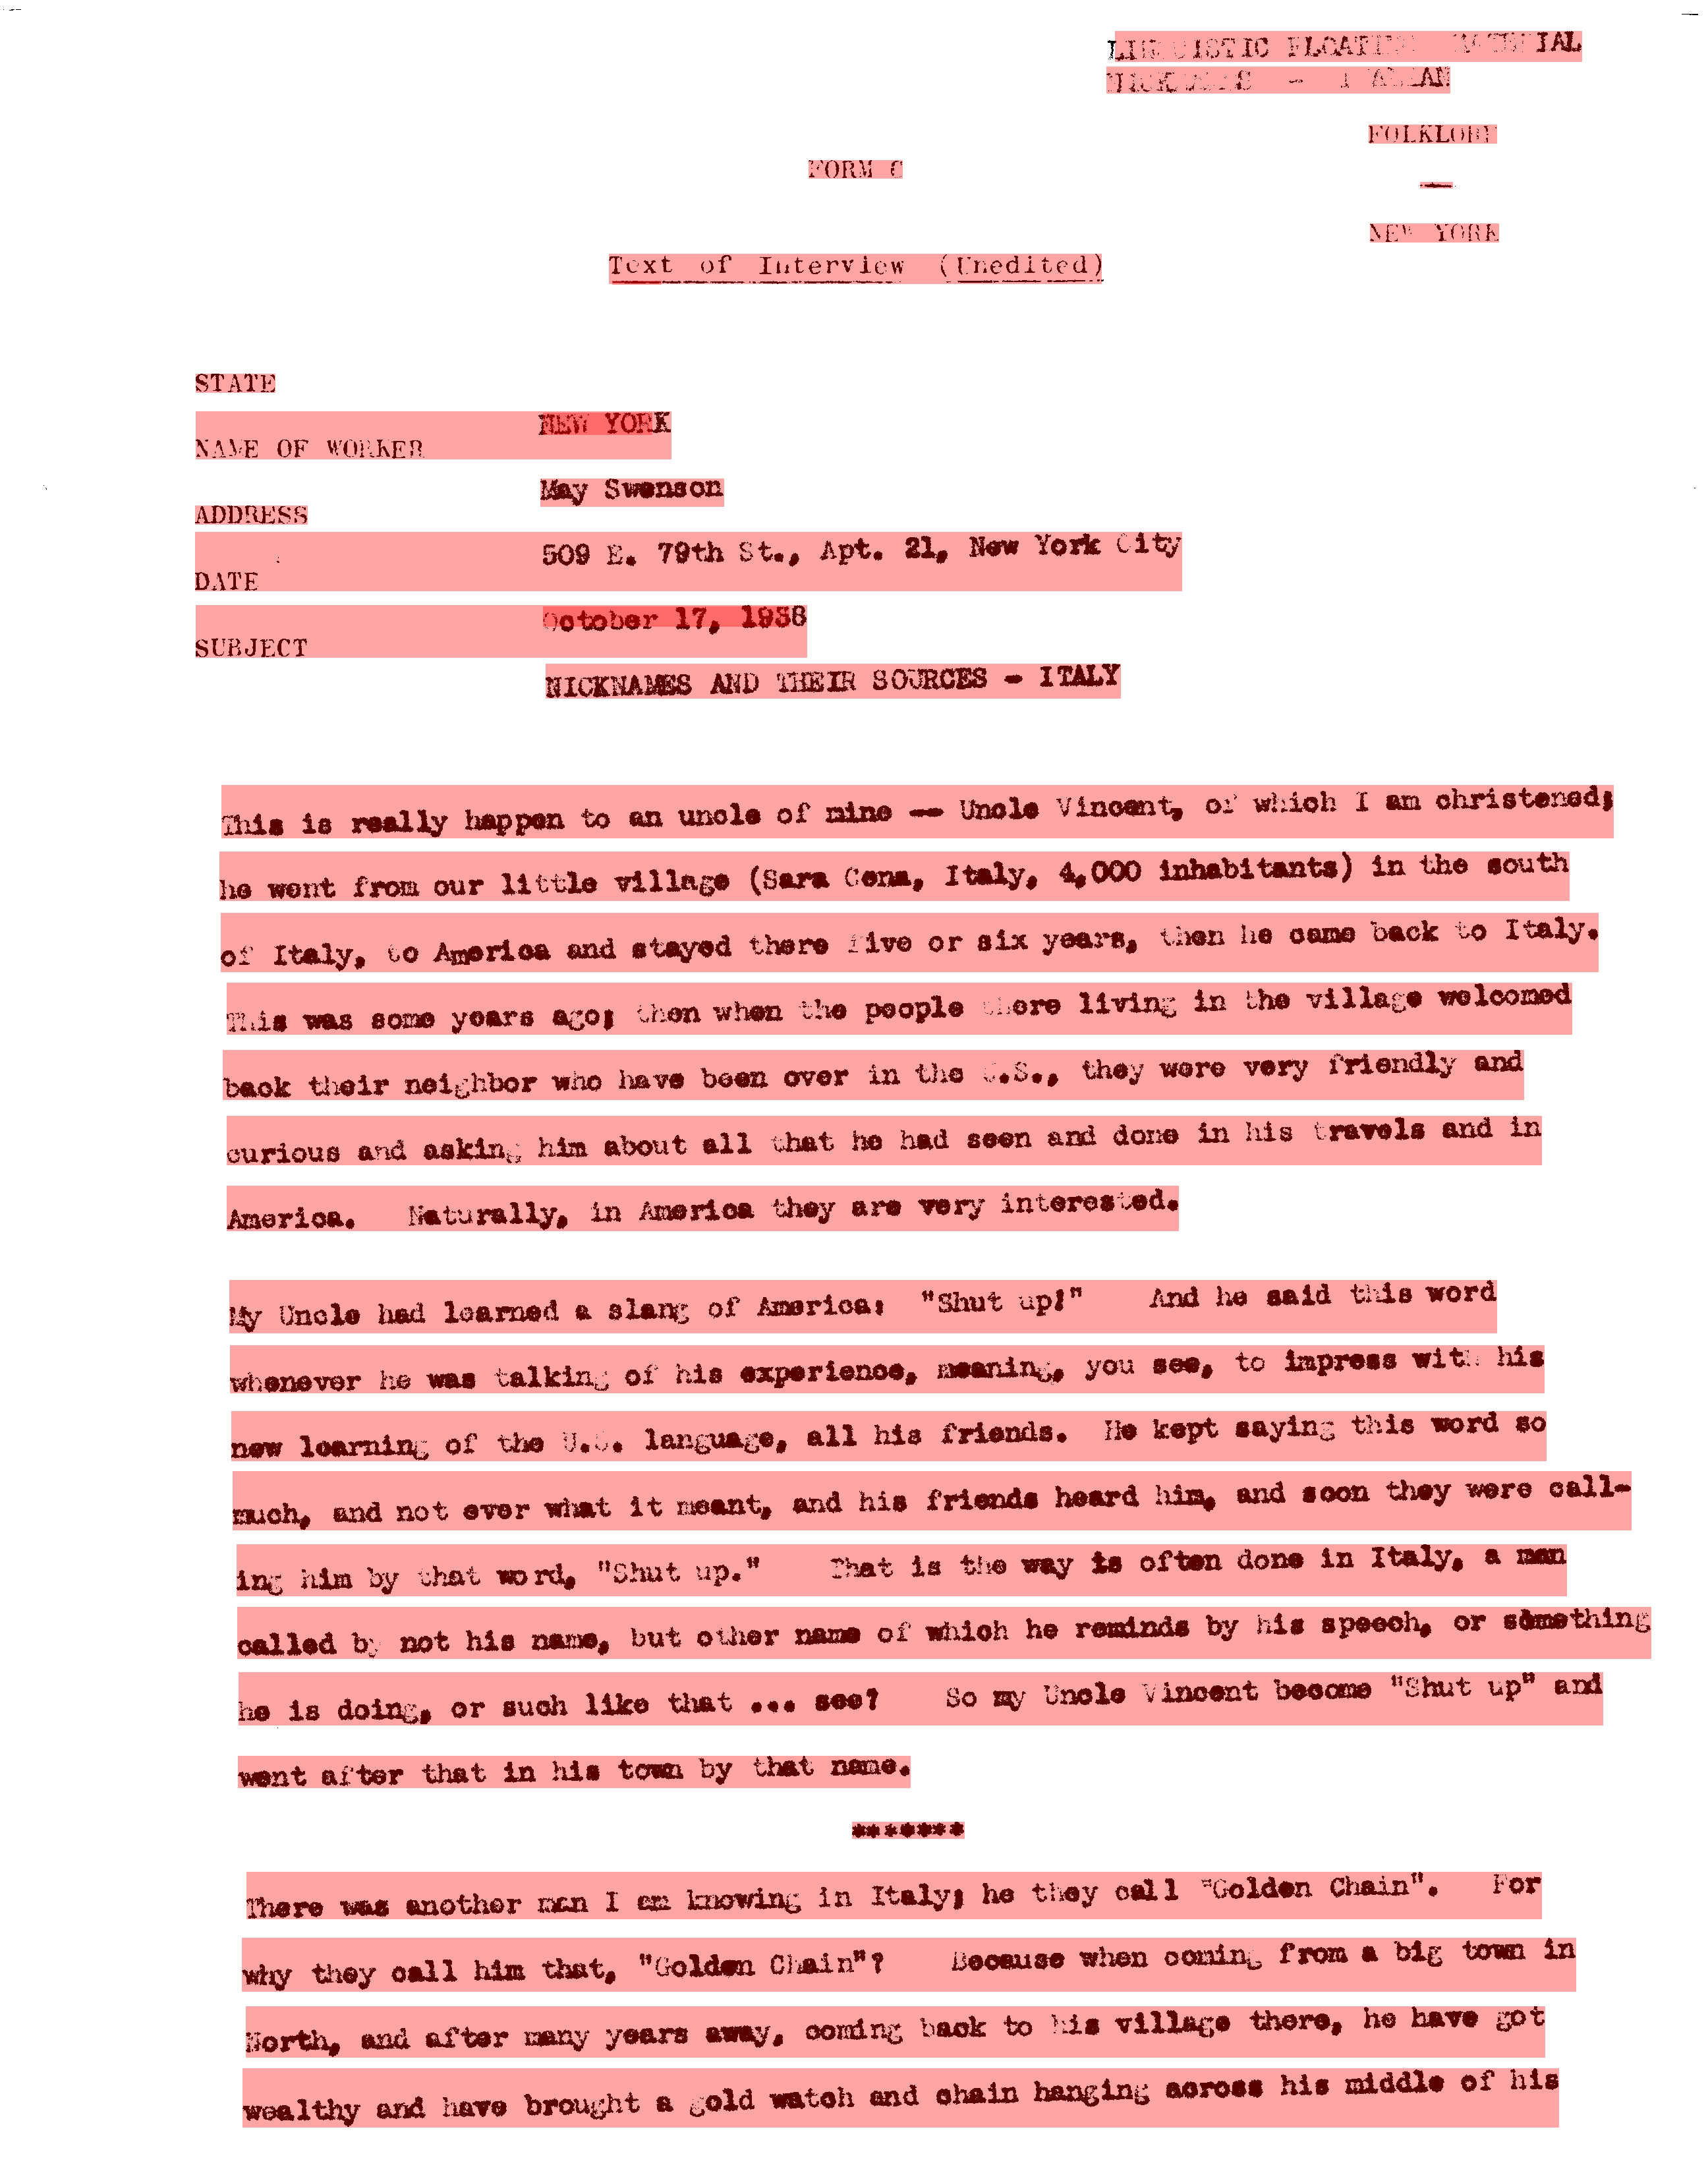

In [12]:
imagebuilder(np_array, 'wpa-lifehistory-swenson-1938.tif')

This ability to locate where a line is located on a page has tremendous use because we can establish a semantic meaning from that information, for example, is it in a column or table, and if so, does that give it some attribute?

<img align="left" width="600" src="265.56750728.939e2500-5293-0134-d453-00505686a51c 2.jpeg" alt="An image of a nineteenth-century New York City Directory illustrating the two-column layout with indents used.">

Using x-locations of bounding boxes to identify spans of column locations and indents. Use y-locations to crop headers and detect gaps on page:

<img align="left" width="600" src="265.56750728.939e2500-5293-0134-d453-00505686a51c.jpeg" alt="An image of a nineteenth-century New York City Directory illustrating the two-column layout wwith column locations identified.">


But...Tesseract can get bounding boxess wrong, and that throws things off:

<img align="left" width="600" src="146.56750609.88c618c0-5293-0134-1278-00505686a51c.jpeg" alt="An example of a digital image for which OCR has not drawn the bounding boxes so as to recognize columns">